In [1]:
# data preprocess
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_train = pd.read_csv('../Shu Rui/train.csv')
df_test = pd.read_csv('../Shu Rui/test.csv')

In [3]:
X_train = df_train.drop(["Close (t)","movement"],1)
y_train = df_train['Close (t)']
X_test = df_test.drop(["Close (t)","movement"],1)
y_test = df_test['Close (t)']

In [4]:
#scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Run KNN Regressor to predict CLose(t)
knn = neighbors.KNeighborsRegressor(n_neighbors = 9, metric='euclidean')
knn_model = knn.fit(X_train, y_train)

In [6]:
print('kNN R-squared for training set: %f' % knn_model.score(X_train, y_train))
print('kNN R-squared for test set: %f' % knn_model.score(X_test, y_test))

y_pred = knn_model.predict(X_test)
print('kNN MAE for test set: %f' % mean_absolute_error(y_test, y_pred))
print('kNN MSE for test set: %f' % mean_squared_error(y_test, y_pred, squared=True))
print('kNN RMSE for test set: %f' % mean_squared_error(y_test, y_pred, squared=False))

kNN R-squared for training set: 0.996624
kNN R-squared for test set: 0.655715
kNN MAE for test set: 156.687014
kNN MSE for test set: 65660.867449
kNN RMSE for test set: 256.243766


In [7]:
mvt_pred = np.where(y_pred > df_test['Close (t-1)'], 1, 0)
mvt_label = pd.DataFrame(df_test['movement'])

In [8]:
def evaluate(predicted, label_test):
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    cm = confusion_matrix(label_test, predicted)
    f = sns.heatmap(cm, annot=True, fmt='d')
    
    classification = classification_report(label_test, predicted)
    print(classification)

accuracy: 0.3236459709379128
precision: 0.6875093937902341
recall: 0.3236459709379128
f1 0.21175541552827595
metrics.roc_auc_score 0.5168507770080509
              precision    recall  f1-score   support

           0       0.30      0.97      0.45       218
           1       0.85      0.06      0.11       539

    accuracy                           0.32       757
   macro avg       0.57      0.52      0.28       757
weighted avg       0.69      0.32      0.21       757



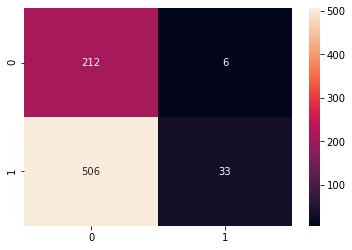

In [9]:
metric_test = evaluate(mvt_pred, mvt_label)